<a href="https://www.kaggle.com/code/georgelukaanya/adamnea-monthly-insights?scriptVersionId=211556576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data and set the 'created_at' column as the index
carbondioxide = pd.read_csv('/kaggle/input/monthly-insights-apr-nov/hive_carbondioxide_APR_NOV_hive1.csv', index_col='created_at')
humidity = pd.read_csv('/kaggle/input/monthly-insights-apr-nov/hive_humidity_APR_NOV_hive1.csv', index_col='created_at')
temperatures = pd.read_csv('/kaggle/input/monthly-insights-apr-nov/hive_temperatures_APR_NOV_hive1.csv', index_col='created_at')
weights = pd.read_csv('/kaggle/input/monthly-insights-apr-nov/hive_weights_APR_NOV_hive1.csv', index_col='created_at')

# Convert the index to datetime
carbondioxide.index = pd.to_datetime(carbondioxide.index)
humidity.index = pd.to_datetime(humidity.index)
temperatures.index = pd.to_datetime(temperatures.index)
weights.index = pd.to_datetime(weights.index)


# Check for and remove duplicates in the index
humidity = humidity[~humidity.index.duplicated(keep='first')]
carbondioxide = carbondioxide[~carbondioxide.index.duplicated(keep='first')]
temperatures = temperatures[~temperatures.index.duplicated(keep='first')]
weights = weights[~weights.index.duplicated(keep='first')]

In [3]:
#Cleaning the humidity data
# Replace '*2*' with a comma in the 'record' column
humidity['record'] = humidity['record'].str.replace('*2*', ',', regex=False)

# Split the 'record' column and assign to new columns
humidity[['Interior (%)', 'Exterior (%)']] = humidity['record'].str.split(',', expand=True)

# Drop the 'record' column as it's no longer needed
humidity = humidity.drop(columns=['record'])

# Convert new columns to numeric types
humidity['Interior (%)'] = pd.to_numeric(humidity['Interior (%)'], errors='coerce')
humidity['Exterior (%)'] = pd.to_numeric(humidity['Exterior (%)'], errors='coerce')

# Replace values of 2 with NaN (without inplace to avoid warnings)
humidity['Interior (%)'] = humidity['Interior (%)'].replace(2, np.nan)
humidity['Exterior (%)'] = humidity['Exterior (%)'].replace(2, np.nan)

# Display the resulting DataFrame
humidity.head()


,Interior (%),Exterior (%)
created_at,,
2024-04-02 14:52:00,NaN,NaN
2024-04-02 14:54:00,NaN,NaN
2024-04-02 15:06:00,NaN,NaN
2024-04-02 15:54:00,NaN,NaN
2024-04-03 17:08:00,94.2,84.3


In [4]:
#Cleanind the CO2 data
#replacing 2 with NaN
carbondioxide['record'] = carbondioxide.record.replace(2, np.nan)
carbondioxide.head()

,record
created_at,
2024-04-02 14:52:00,NaN
2024-04-02 14:54:00,661.0
2024-04-02 15:06:00,530.0
2024-04-02 15:54:00,405.0
2024-04-03 17:08:00,7330.0


In [5]:
#Cleaning the weights data, replacing the 2 with NaN
weights.record = weights.record.replace(2, np.nan)
weights.head()

,record
created_at,
2024-04-02 14:52:00,NaN
2024-04-02 14:54:00,103.0
2024-04-02 15:06:00,96.0
2024-04-02 15:54:00,NaN
2024-04-03 17:08:00,15.0


In [6]:
#Cleaning the temperature data
# Replace '*2*' with a comma in the 'record' column
temperatures['record'] = temperatures['record'].str.replace('*2*', ',', regex=False)

# Split the 'record' column and assign to new columns
temperatures[['Interior (°C)', 'Exterior (°C)']] = temperatures['record'].str.split(',', expand=True)

# Drop the 'record' column as it's no longer needed
temperatures = temperatures.drop(columns=['record'])

# Convert new columns to numeric types
temperatures['Interior (°C)'] = pd.to_numeric(temperatures['Interior (°C)'], errors='coerce')
temperatures['Exterior (°C)'] = pd.to_numeric(temperatures['Exterior (°C)'], errors='coerce')

# Replace values of 2 with NaN (without inplace to avoid warnings)
temperatures['Interior (°C)'] = temperatures['Interior (°C)'].replace(2, np.nan)
temperatures['Exterior (°C)'] = temperatures['Exterior (°C)'].replace(2, np.nan)

# Display the resulting DataFrame
temperatures.head()


,Interior (°C),Exterior (°C)
created_at,,
2024-04-02 14:52:00,NaN,NaN
2024-04-02 14:54:00,NaN,NaN
2024-04-02 15:06:00,NaN,NaN
2024-04-02 15:54:00,NaN,NaN
2024-04-03 17:08:00,27.3,23.9


In [7]:
# Remove NaN values from each DataFrame
carbondioxide.dropna(inplace=True)
humidity.dropna(inplace=True)
temperatures.dropna(inplace=True)
weights.dropna(inplace=True)

In [8]:
carbondioxide.describe()

,record
count,1291.000000
mean,2235.145624
std,3791.105946
min,0.000000
25%,448.000000
50%,735.000000
75%,1590.000000
max,22857.000000


In [9]:
weights.describe()

,record
count,869.000000
mean,32.416387
std,27.332828
min,0.000000
25%,15.000000
50%,22.530000
75%,26.380000
max,211.430000


In [10]:
temperatures.describe()

,Interior (°C),Exterior (°C)
count,1062.000000,1062.000000
mean,27.208380,25.420245
std,3.209284,2.564581
min,17.100000,17.700000
25%,25.600000,23.500000
50%,26.700000,25.900000
75%,28.300000,27.400000
max,35.800000,31.700000


In [11]:
humidity.describe()

,Interior (%),Exterior (%)
count,1061.000000,1061.000000
mean,73.635910,73.330066
std,9.778464,10.649756
min,49.100000,48.800000
25%,66.300000,65.900000
50%,72.000000,71.300000
75%,83.100000,80.800000
max,98.400000,99.900000


In [12]:
# Import the calendar module to get month names
import calendar

# Cell 1: Define the monthly_analysis function
def monthly_analysis(df, month, columns):
    """
    Perform exploratory data analysis for a given month on specified columns.
    
    Parameters:
    - df: DataFrame to analyze.
    - month: Integer month (1=January, 2=February, ...).
    - columns: List of columns for which to derive insights.
    
    Returns:
    - insights: Dictionary containing mean, standard deviation, IQR, skewness, and outliers count.
    """
    # Convert month number to month name
    month_name = calendar.month_name[month]
    
    # Filter data for the specified month
    monthly_data = df[df.index.month == month]
    
    insights = {}  # Dictionary to store calculated insights
    
    for col in columns:
        # Calculate and store each statistical metric
        insights[col] = {
            'mean': monthly_data[col].mean(),
            'std_dev': monthly_data[col].std(),
            'iqr': monthly_data[col].quantile(0.75) - monthly_data[col].quantile(0.25),
            'skewness': monthly_data[col].skew()
        }
        
        # Outlier detection based on IQR method
        q1 = monthly_data[col].quantile(0.25)
        q3 = monthly_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = monthly_data[(monthly_data[col] < lower_bound) | (monthly_data[col] > upper_bound)]
        
        # Remove outliers for visualization
        monthly_data_no_outliers = monthly_data[~((monthly_data[col] < lower_bound) | (monthly_data[col] > upper_bound))]
        
        # Box plot for data with outliers removed
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=monthly_data_no_outliers, y=col)
        plt.title(f'{col} Box Plot ({month_name} - Outliers Removed)')
        plt.ylabel(col)
        plt.show()
        
        insights[col]['outliers_removed'] = outliers.shape[0]  # Record count of outliers
    
    return insights
    
# Function to display insights in a readable format
def display_insights(month_name, insights):
    print(f"{month_name} Insights:")
    for category, metrics in insights.items():
        print(f"\n{category}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value}")
    print("\n" + "="*40)


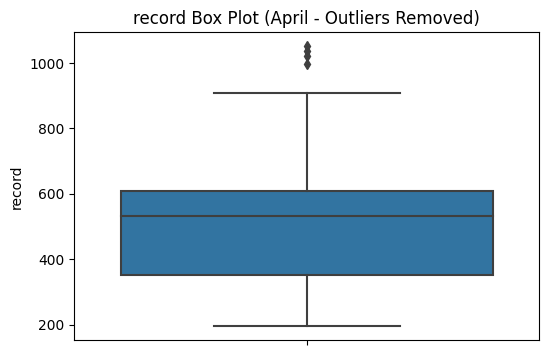

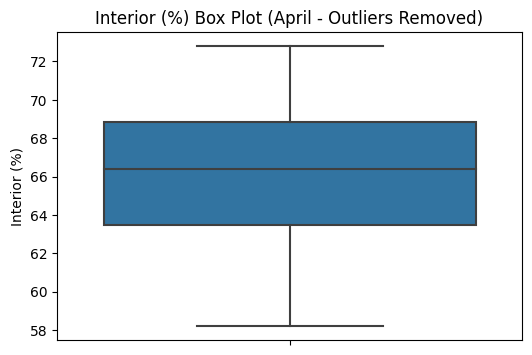

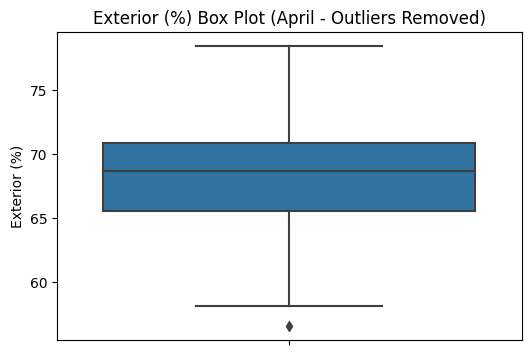

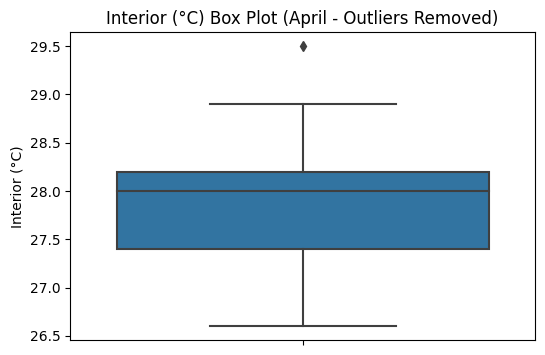

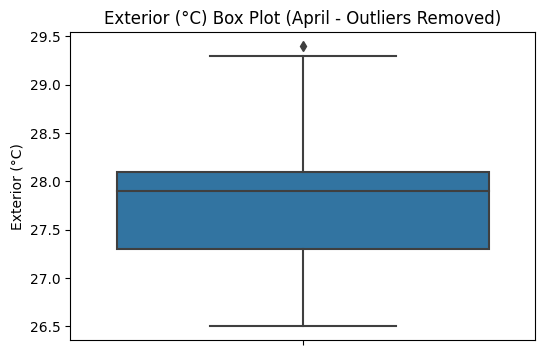

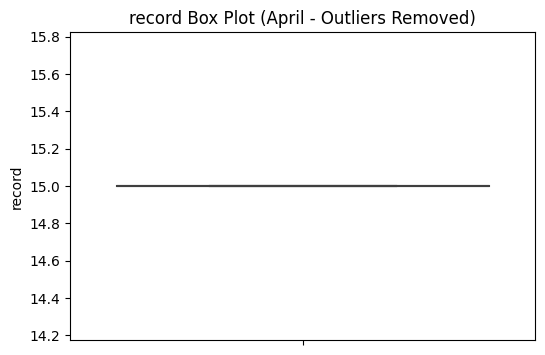

April CO2 Insights:

record:
  Mean: 700.6666666666666
  Std_dev: 1014.465466969413
  Iqr: 295.0
  Skewness: 5.308166570042313
  Outliers_removed: 5

April Humidity Insights:

Interior (%):
  Mean: 68.55243902439025
  Std_dev: 7.952113246730624
  Iqr: 6.425000000000004
  Skewness: 2.217262621642222
  Outliers_removed: 7

Exterior (%):
  Mean: 69.39512195121951
  Std_dev: 5.866454172057047
  Iqr: 6.775000000000006
  Skewness: 1.3852552037420154
  Outliers_removed: 4

April Temperature Insights:

Interior (°C):
  Mean: 27.706097560975618
  Std_dev: 0.8427391496275496
  Iqr: 0.875
  Skewness: -1.902908771869941
  Outliers_removed: 3

Exterior (°C):
  Mean: 27.489024390243905
  Std_dev: 1.3649045638921333
  Iqr: 0.9000000000000021
  Skewness: -2.579607362408036
  Outliers_removed: 7

April Weight Insights:

record:
  Mean: 17.139240506329113
  Std_dev: 13.37020623626986
  Iqr: 0.0
  Skewness: 6.178363960864736
  Outliers_removed: 2



In [13]:
# Example: Implement the analysis for April (month=4) on each dataset
co2_insights_april = monthly_analysis(carbondioxide, 4, ['record'])
humidity_insights_april = monthly_analysis(humidity, 4, ['Interior (%)', 'Exterior (%)'])
temperature_insights_april = monthly_analysis(temperatures, 4, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_april = monthly_analysis(weights, 4, ['record'])

# Displaying April insights
display_insights("April CO2", co2_insights_april)
display_insights("April Humidity", humidity_insights_april)
display_insights("April Temperature", temperature_insights_april)
display_insights("April Weight", weight_insights_april)

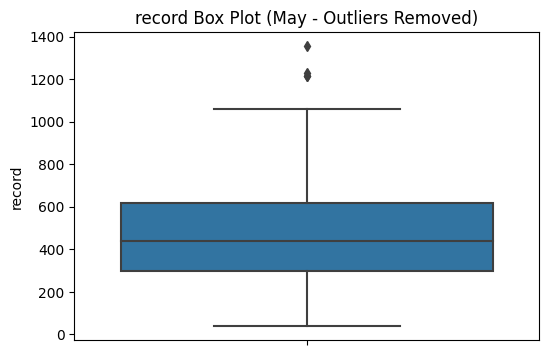

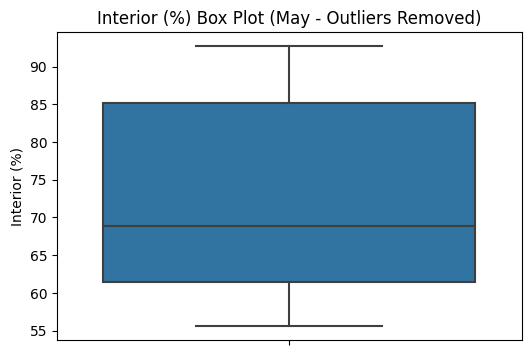

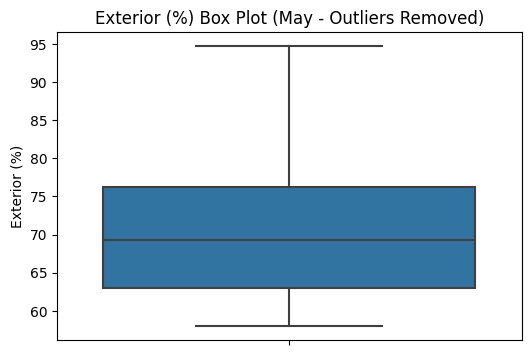

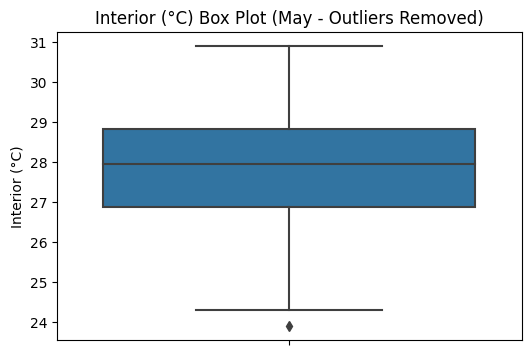

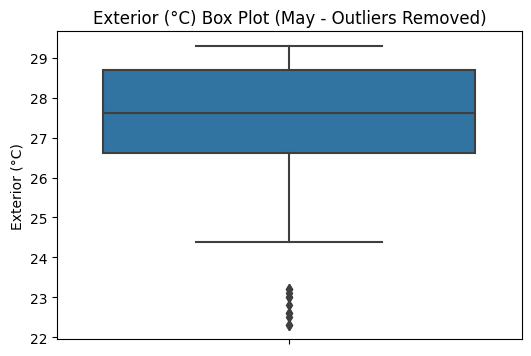

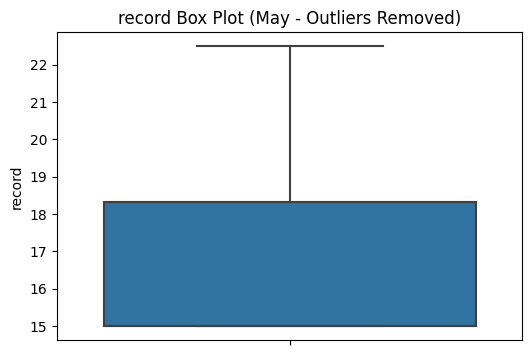

May CO2 Insights: Insights:

record:
  Mean: 1319.1386861313867
  Std_dev: 1819.9190196208383
  Iqr: 598.0
  Skewness: 1.8228112918759807
  Outliers_removed: 26

May Humidity Insights: Insights:

Interior (%):
  Mean: 72.14436090225564
  Std_dev: 12.063044074926168
  Iqr: 23.599999999999994
  Skewness: 0.29145122181729083
  Outliers_removed: 0

Exterior (%):
  Mean: 71.22105263157894
  Std_dev: 9.917867658099324
  Iqr: 13.400000000000006
  Skewness: 0.8152600532874574
  Outliers_removed: 2

May Temperature Insights: Insights:

Interior (°C):
  Mean: 27.6406015037594
  Std_dev: 1.5078098502606936
  Iqr: 2.0
  Skewness: -0.6141449430871727
  Outliers_removed: 1

Exterior (°C):
  Mean: 26.936842105263153
  Std_dev: 2.1424452782591503
  Iqr: 2.599999999999998
  Skewness: -1.0707757669267313
  Outliers_removed: 5

May Weight Insights: Insights:

record:
  Mean: 16.293432835820894
  Std_dev: 2.2811783343700722
  Iqr: 3.3275000000000006
  Skewness: 1.682297816169862
  Outliers_removed: 1



In [14]:
#Perform analysis for May (month=5) on each dataset
co2_insights_may = monthly_analysis(carbondioxide, 5, ['record'])
humidity_insights_may = monthly_analysis(humidity, 5, ['Interior (%)', 'Exterior (%)'])
temperature_insights_may = monthly_analysis(temperatures, 5, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_may = monthly_analysis(weights, 5, ['record'])

# Displaying May insights
display_insights("May CO2 Insights:", co2_insights_may)
display_insights("May Humidity Insights:", humidity_insights_may)
display_insights("May Temperature Insights:", temperature_insights_may)
display_insights("May Weight Insights:", weight_insights_may)


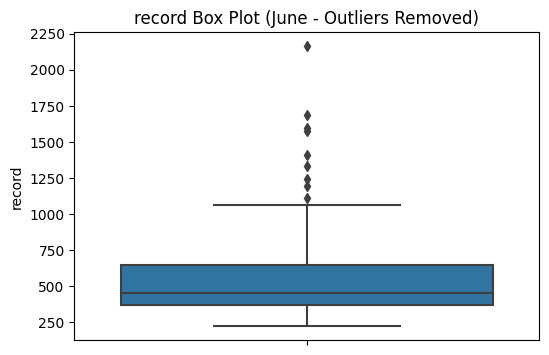

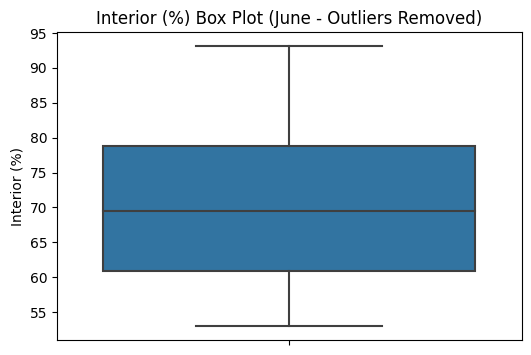

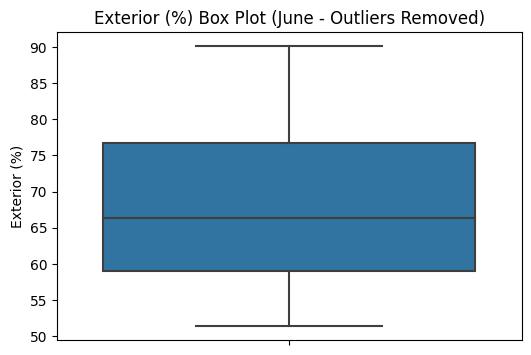

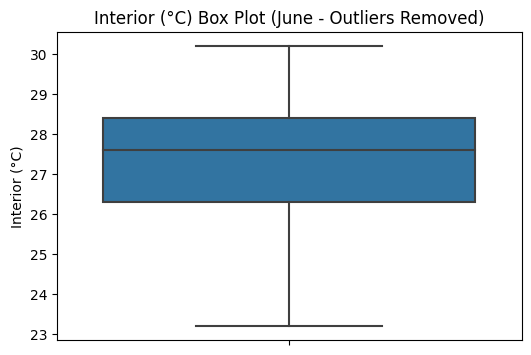

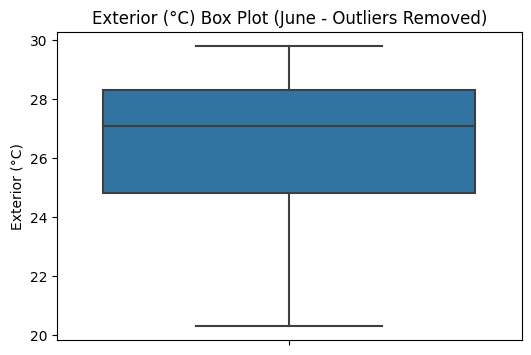

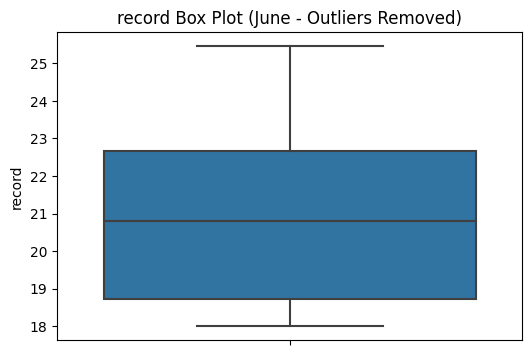

June CO2 Insights: Insights:

record:
  Mean: 1190.724358974359
  Std_dev: 1373.2291098167027
  Iqr: 752.75
  Skewness: 1.729855213823015
  Outliers_removed: 31

June Humidity Insights: Insights:

Interior (%):
  Mean: 70.57737226277372
  Std_dev: 9.978661002216988
  Iqr: 17.9
  Skewness: 0.13148369420546485
  Outliers_removed: 0

Exterior (%):
  Mean: 67.90583941605841
  Std_dev: 10.630344790098585
  Iqr: 17.700000000000003
  Skewness: 0.3234205074435665
  Outliers_removed: 0

June Temperature Insights: Insights:

Interior (°C):
  Mean: 27.17608695652174
  Std_dev: 1.8126302358576651
  Iqr: 2.099999999999998
  Skewness: -0.7777142129505961
  Outliers_removed: 1

Exterior (°C):
  Mean: 26.331884057971017
  Std_dev: 2.556142894559737
  Iqr: 3.4750000000000014
  Skewness: -0.6725854330770208
  Outliers_removed: 0

June Weight Insights: Insights:

record:
  Mean: 22.785714285714285
  Std_dev: 7.833180302456574
  Iqr: 3.995000000000001
  Skewness: 4.388122620485368
  Outliers_removed: 8



In [15]:
#Perform analysis for April (month=4) on each dataset
co2_insights_june = monthly_analysis(carbondioxide, 6, ['record'])
humidity_insights_june = monthly_analysis(humidity, 6, ['Interior (%)', 'Exterior (%)'])
temperature_insights_june = monthly_analysis(temperatures, 6, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_june = monthly_analysis(weights, 6, ['record'])

# Displaying April insights
display_insights("June CO2 Insights:", co2_insights_june)
display_insights("June Humidity Insights:", humidity_insights_june)
display_insights("June Temperature Insights:", temperature_insights_june)
display_insights("June Weight Insights:", weight_insights_june)


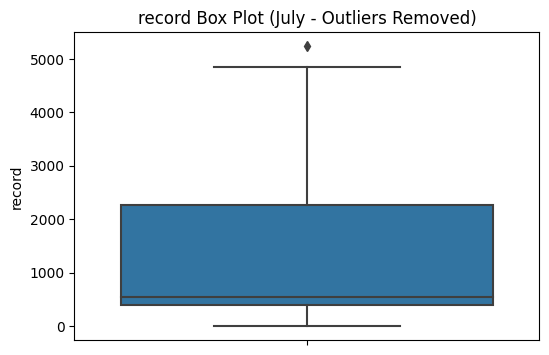

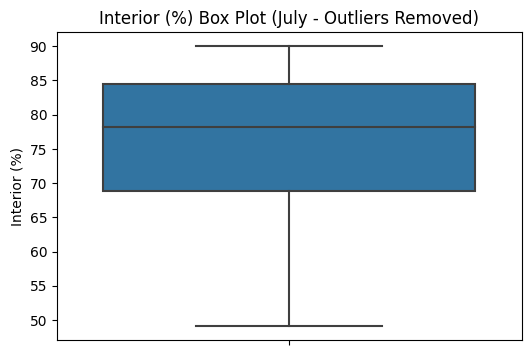

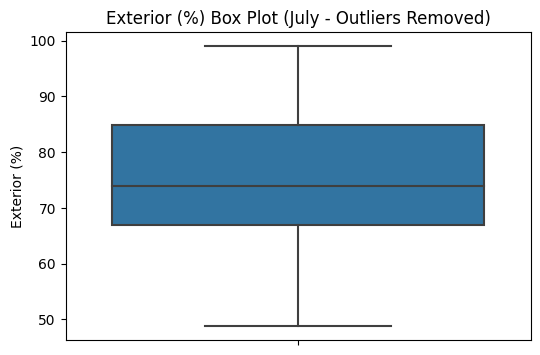

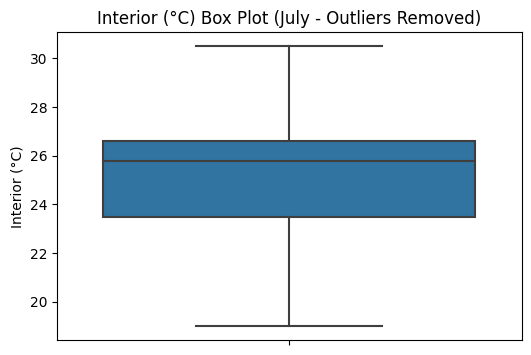

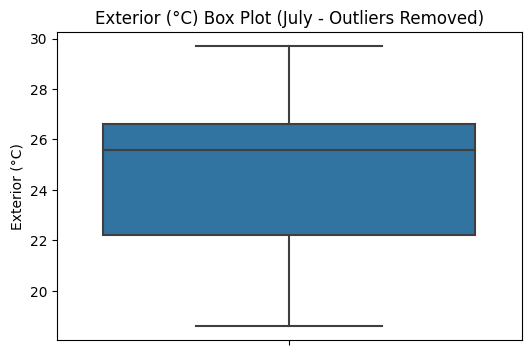

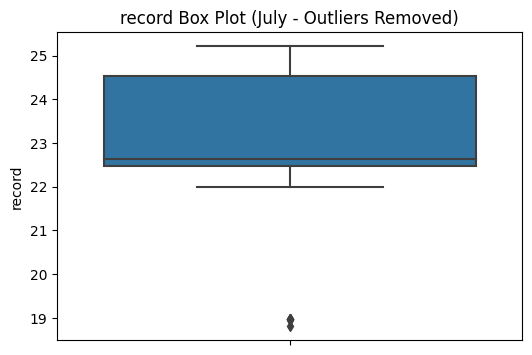

July CO2 Insights: Insights:

record:
  Mean: 1432.7087087087086
  Std_dev: 1562.5913127484557
  Iqr: 2171.0
  Skewness: 1.6921558012166182
  Outliers_removed: 6

July Humidity Insights: Insights:

Interior (%):
  Mean: 76.6861963190184
  Std_dev: 8.850388584852007
  Iqr: 15.5
  Skewness: -0.58081428566445
  Outliers_removed: 0

Exterior (%):
  Mean: 75.52944785276073
  Std_dev: 10.825436896582405
  Iqr: 17.900000000000006
  Skewness: 0.09621798312390768
  Outliers_removed: 0

July Temperature Insights: Insights:

Interior (°C):
  Mean: 25.14631901840491
  Std_dev: 2.2876192413290126
  Iqr: 3.1000000000000014
  Skewness: -0.5183833617363721
  Outliers_removed: 1

Exterior (°C):
  Mean: 24.58957055214724
  Std_dev: 2.5436403591202787
  Iqr: 4.400000000000002
  Skewness: -0.38180889235282023
  Outliers_removed: 0

July Weight Insights: Insights:

record:
  Mean: 21.51343612334802
  Std_dev: 4.995935569201197
  Iqr: 2.289999999999999
  Skewness: -3.2512433162992243
  Outliers_removed: 41


In [16]:
#Perform analysis for June (month=6) on each dataset
co2_insights_july = monthly_analysis(carbondioxide, 7, ['record'])
humidity_insights_july = monthly_analysis(humidity, 7, ['Interior (%)', 'Exterior (%)'])
temperature_insights_july = monthly_analysis(temperatures, 7, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_july = monthly_analysis(weights, 7, ['record'])

# Displaying June insights
display_insights("July CO2 Insights:", co2_insights_july)
display_insights("July Humidity Insights:", humidity_insights_july)
display_insights("July Temperature Insights:", temperature_insights_july)
display_insights("July Weight Insights:", weight_insights_july)


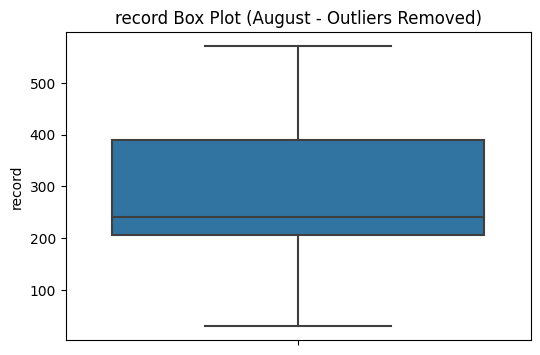

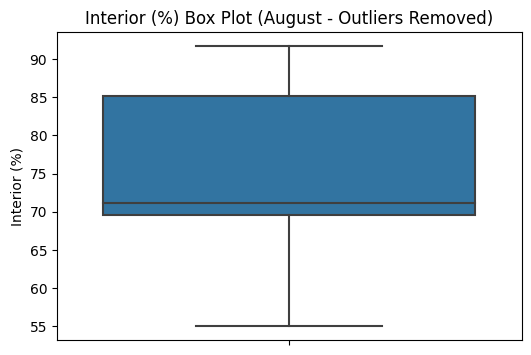

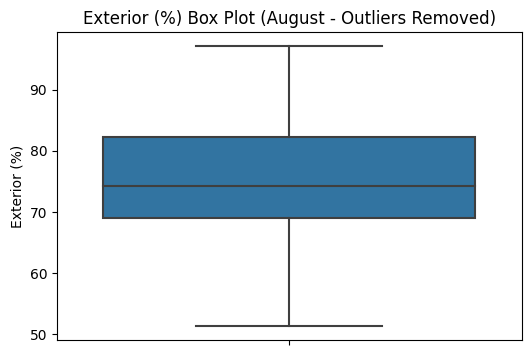

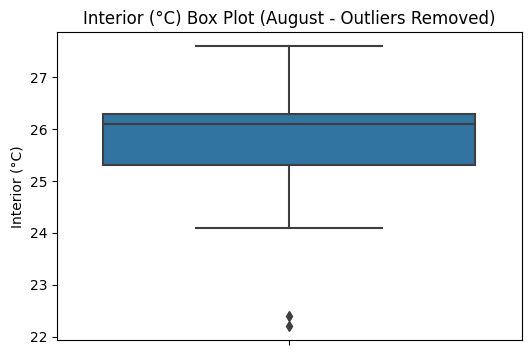

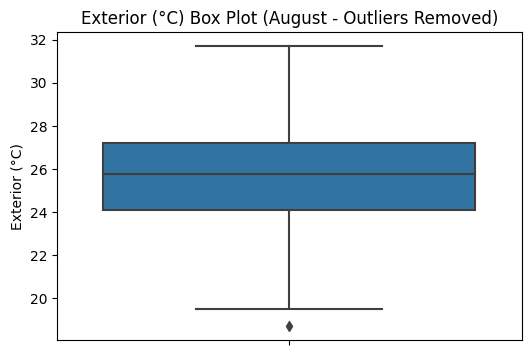

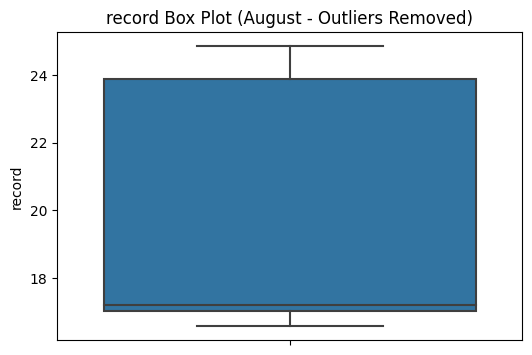

August CO2 Insights: Insights:

record:
  Mean: 301.25
  Std_dev: 149.53256227152391
  Iqr: 196.25
  Skewness: 0.9173372014867482
  Outliers_removed: 1

August Humidity Insights: Insights:

Interior (%):
  Mean: 75.73076923076923
  Std_dev: 10.636509960017648
  Iqr: 15.5
  Skewness: -0.22705472605862564
  Outliers_removed: 0

Exterior (%):
  Mean: 76.27692307692307
  Std_dev: 10.954654419072085
  Iqr: 13.25
  Skewness: 0.2194676901672373
  Outliers_removed: 0

August Temperature Insights: Insights:

Interior (°C):
  Mean: 24.705128205128208
  Std_dev: 2.6995076274201053
  Iqr: 1.8999999999999986
  Skewness: -1.5138357256051087
  Outliers_removed: 6

Exterior (°C):
  Mean: 25.071794871794868
  Std_dev: 3.209275104078368
  Iqr: 3.5500000000000007
  Skewness: -0.531906093047353
  Outliers_removed: 1

August Weight Insights: Insights:

record:
  Mean: 20.165000000000003
  Std_dev: 3.5637626259410227
  Iqr: 6.884999999999998
  Skewness: 0.23256133444637628
  Outliers_removed: 0



In [17]:
#Perform analysis for August (month=8) on each dataset
co2_insights_august = monthly_analysis(carbondioxide, 8, ['record'])
humidity_insights_august = monthly_analysis(humidity, 8, ['Interior (%)', 'Exterior (%)'])
temperature_insights_august = monthly_analysis(temperatures, 8, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_august = monthly_analysis(weights, 8, ['record'])

# Displaying April insights
display_insights("August CO2 Insights:", co2_insights_august)
display_insights("August Humidity Insights:", humidity_insights_august)
display_insights("August Temperature Insights:", temperature_insights_august)
display_insights("August Weight Insights:", weight_insights_august)


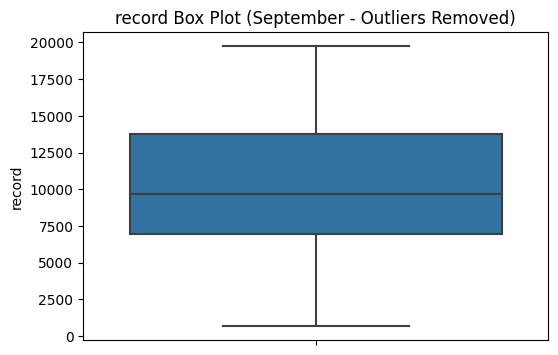

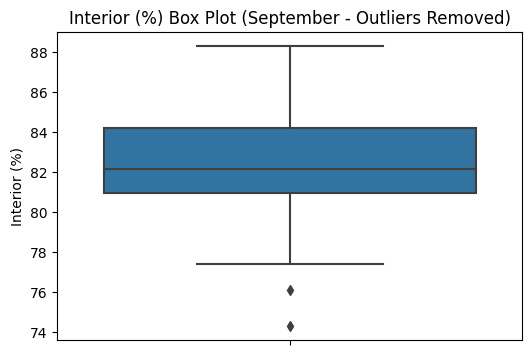

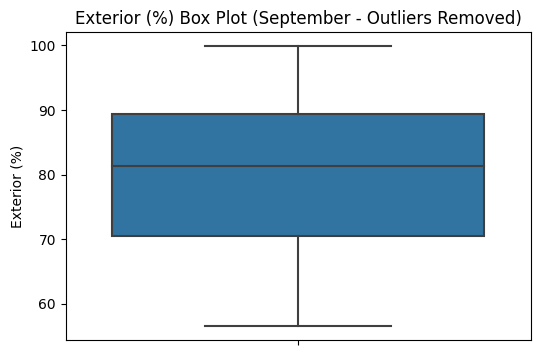

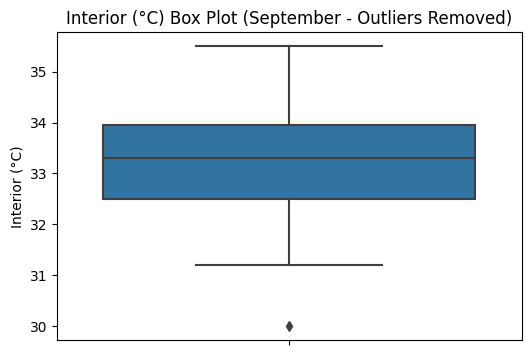

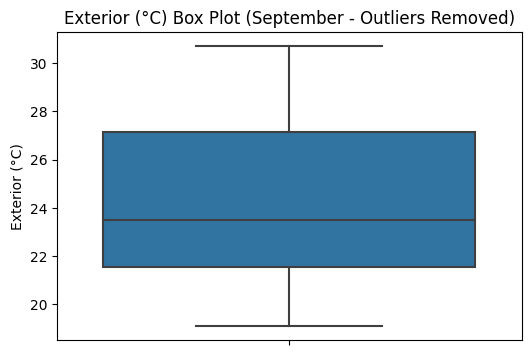

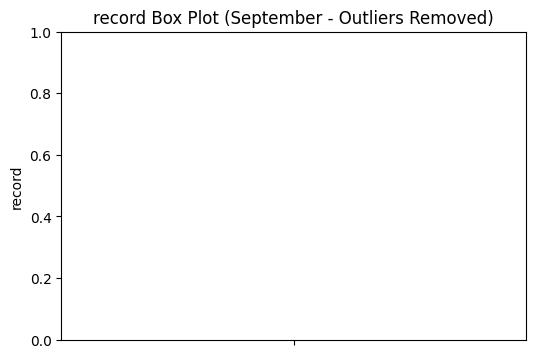

September CO2 Insights: Insights:

record:
  Mean: 10134.957142857143
  Std_dev: 5032.573682292378
  Iqr: 6790.0
  Skewness: -0.19769397935717478
  Outliers_removed: 0

September Humidity Insights: Insights:

Interior (%):
  Mean: 80.07205882352942
  Std_dev: 6.8169640370956435
  Iqr: 4.2749999999999915
  Skewness: -2.0148215512200007
  Outliers_removed: 8

Exterior (%):
  Mean: 79.44117647058823
  Std_dev: 12.731172640578487
  Iqr: 18.999999999999986
  Skewness: -0.19659658712320952
  Outliers_removed: 0

September Temperature Insights: Insights:

Interior (°C):
  Mean: 32.62352941176471
  Std_dev: 2.3323242937169644
  Iqr: 1.8500000000000014
  Skewness: -1.4198696390705894
  Outliers_removed: 8

Exterior (°C):
  Mean: 24.267647058823524
  Std_dev: 3.283629279731139
  Iqr: 5.600000000000001
  Skewness: 0.1653804667541226
  Outliers_removed: 0

September Weight Insights: Insights:

record:
  Mean: nan
  Std_dev: nan
  Iqr: nan
  Skewness: nan
  Outliers_removed: 0



In [18]:
#Perform analysis for September (month=9) on each dataset
co2_insights_september = monthly_analysis(carbondioxide, 9, ['record'])
humidity_insights_september = monthly_analysis(humidity, 9, ['Interior (%)', 'Exterior (%)'])
temperature_insights_september = monthly_analysis(temperatures, 9, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_september = monthly_analysis(weights, 9, ['record'])

# Displaying April insights
display_insights("September CO2 Insights:", co2_insights_september)
display_insights("September Humidity Insights:", humidity_insights_september)
display_insights("September Temperature Insights:", temperature_insights_september)
display_insights("September Weight Insights:", weight_insights_september)


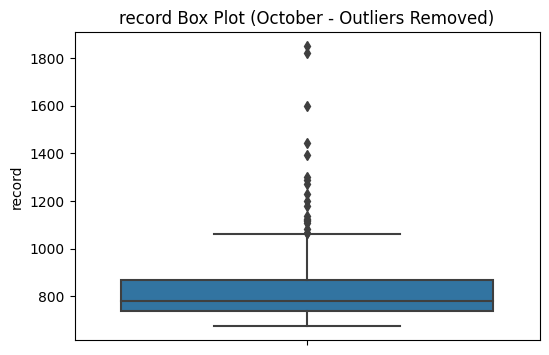

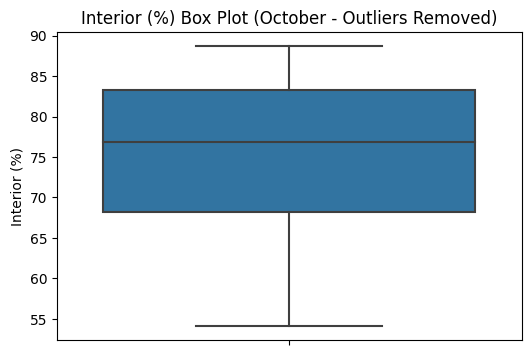

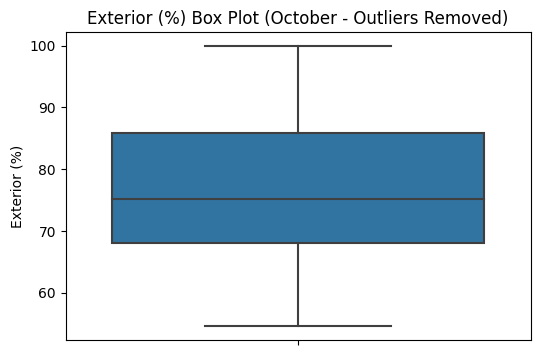

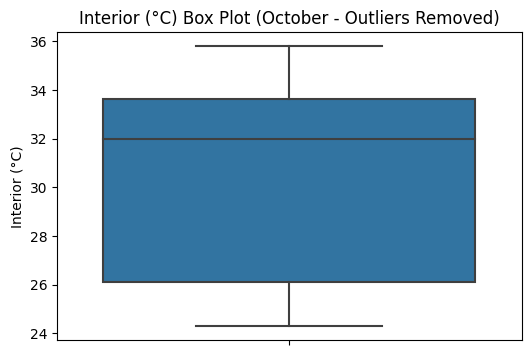

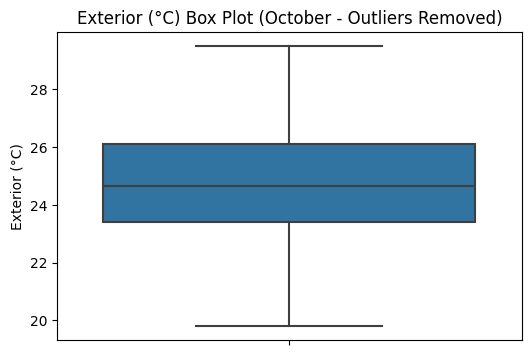

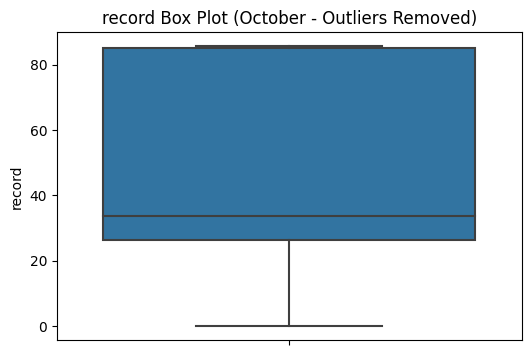

October CO2 Insights: Insights:

record:
  Mean: 700.6666666666666
  Std_dev: 1014.465466969413
  Iqr: 295.0
  Skewness: 5.308166570042313
  Outliers_removed: 5

October Humidity Insights: Insights:

Interior (%):
  Mean: 68.55243902439025
  Std_dev: 7.952113246730624
  Iqr: 6.425000000000004
  Skewness: 2.217262621642222
  Outliers_removed: 7

Exterior (%):
  Mean: 69.39512195121951
  Std_dev: 5.866454172057047
  Iqr: 6.775000000000006
  Skewness: 1.3852552037420154
  Outliers_removed: 4

October Temperature Insights: Insights:

Interior (°C):
  Mean: 27.706097560975618
  Std_dev: 0.8427391496275496
  Iqr: 0.875
  Skewness: -1.902908771869941
  Outliers_removed: 3

Exterior (°C):
  Mean: 27.489024390243905
  Std_dev: 1.3649045638921333
  Iqr: 0.9000000000000021
  Skewness: -2.579607362408036
  Outliers_removed: 7

October Weight Insights: Insights:

record:
  Mean: 17.139240506329113
  Std_dev: 13.37020623626986
  Iqr: 0.0
  Skewness: 6.178363960864736
  Outliers_removed: 2



In [19]:
#Implement the analysis for October (month=10) on each dataset
co2_insights_october = monthly_analysis(carbondioxide, 10, ['record'])
humidity_insights_october = monthly_analysis(humidity, 10, ['Interior (%)', 'Exterior (%)'])
temperature_insights_october = monthly_analysis(temperatures, 10, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_october = monthly_analysis(weights, 10, ['record'])

# Displaying April insights
display_insights("October CO2 Insights:", co2_insights_april)
display_insights("October Humidity Insights:", humidity_insights_april)
display_insights("October Temperature Insights:", temperature_insights_april)
display_insights("October Weight Insights:", weight_insights_april)


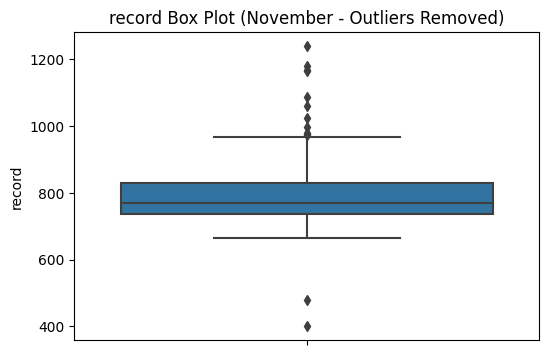

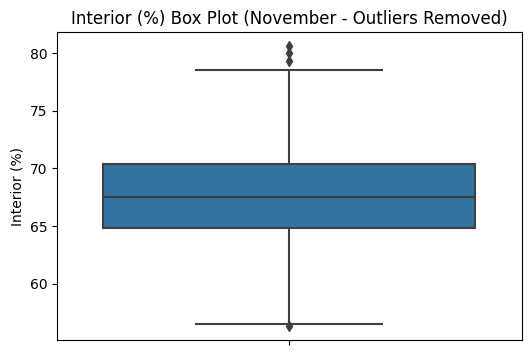

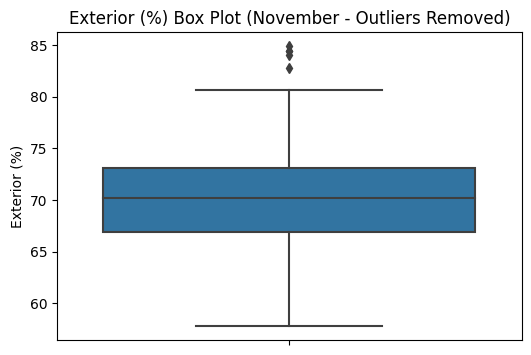

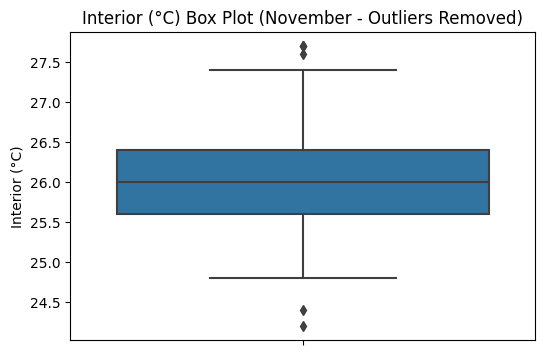

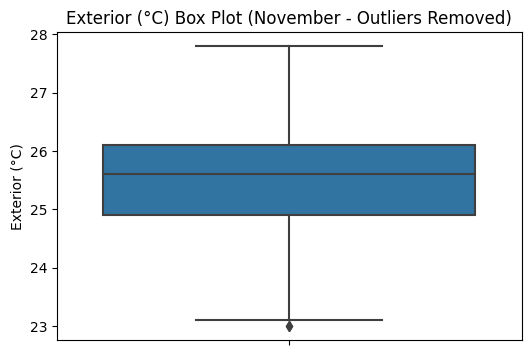

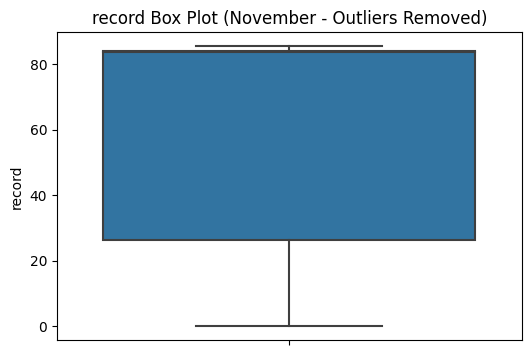

November CO2 Insights: Insights:

record:
  Mean: 700.6666666666666
  Std_dev: 1014.465466969413
  Iqr: 295.0
  Skewness: 5.308166570042313
  Outliers_removed: 5

November Humidity Insights: Insights:

Interior (%):
  Mean: 68.55243902439025
  Std_dev: 7.952113246730624
  Iqr: 6.425000000000004
  Skewness: 2.217262621642222
  Outliers_removed: 7

Exterior (%):
  Mean: 69.39512195121951
  Std_dev: 5.866454172057047
  Iqr: 6.775000000000006
  Skewness: 1.3852552037420154
  Outliers_removed: 4

November Temperature Insights: Insights:

Interior (°C):
  Mean: 27.706097560975618
  Std_dev: 0.8427391496275496
  Iqr: 0.875
  Skewness: -1.902908771869941
  Outliers_removed: 3

Exterior (°C):
  Mean: 27.489024390243905
  Std_dev: 1.3649045638921333
  Iqr: 0.9000000000000021
  Skewness: -2.579607362408036
  Outliers_removed: 7

November Weight Insights: Insights:

record:
  Mean: 17.139240506329113
  Std_dev: 13.37020623626986
  Iqr: 0.0
  Skewness: 6.178363960864736
  Outliers_removed: 2



In [20]:
#Implement the analysis for November (month=11) on each dataset
co2_insights_november = monthly_analysis(carbondioxide, 11, ['record'])
humidity_insights_november = monthly_analysis(humidity, 11, ['Interior (%)', 'Exterior (%)'])
temperature_insights_november = monthly_analysis(temperatures, 11, ['Interior (°C)', 'Exterior (°C)'])
weight_insights_november = monthly_analysis(weights, 11, ['record'])

# Displaying November insights
display_insights("November CO2 Insights:", co2_insights_april)
display_insights("November Humidity Insights:", humidity_insights_april)
display_insights("November Temperature Insights:", temperature_insights_april)
display_insights("November Weight Insights:", weight_insights_april)


In [21]:
# Filtered data for June only
june_data = {
    "carbondioxide": carbondioxide[carbondioxide.index.month == 6],
    "humidity": humidity[humidity.index.month == 6],
    "temperatures": temperatures[temperatures.index.month == 6],
    "weights": weights[weights.index.month == 6]
}


June Internal Temperature Uptime: 138
June Internal Temperature Average: 27.18°C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


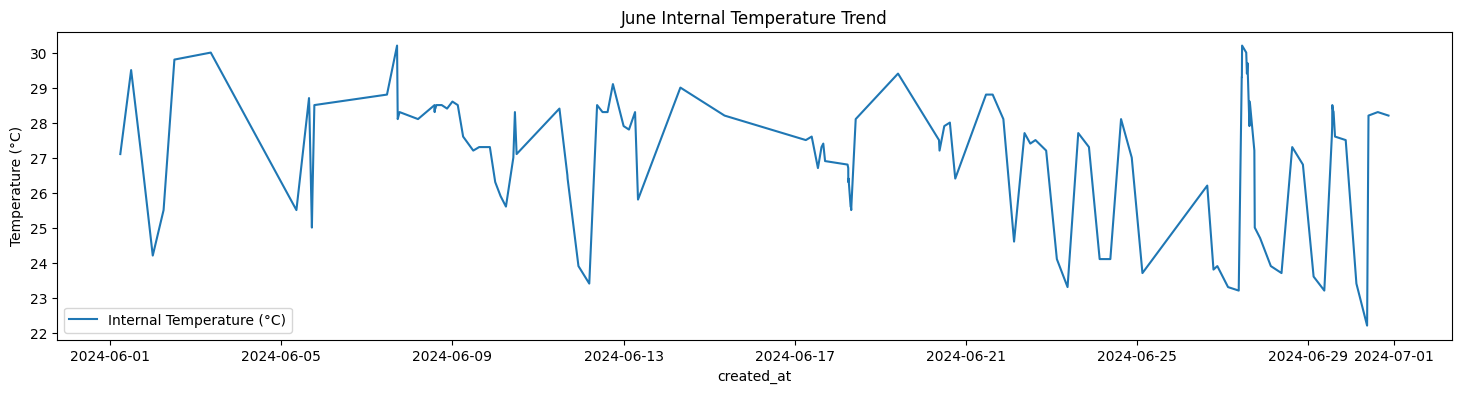

In [22]:
# Internal Temperature Analysis
# 1. Calculate Uptime (number of non-NaN entries)
# 2. Calculate Average Internal Temperature for June
# 3. Plot Internal Temperature for June

internal_temp = june_data["temperatures"]['Interior (°C)']
internal_temp_uptime = internal_temp.count()
internal_temp_avg = internal_temp.mean()

print(f"June Internal Temperature Uptime: {internal_temp_uptime}")
print(f"June Internal Temperature Average: {internal_temp_avg:.2f}°C")

plt.figure(figsize=(18, 4))
sns.lineplot(data=internal_temp, label='Internal Temperature (°C)')
plt.title("June Internal Temperature Trend")
plt.ylabel("Temperature (°C)")
plt.show()


June External Temperature Uptime: 138
June External Temperature Average: 26.33°C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


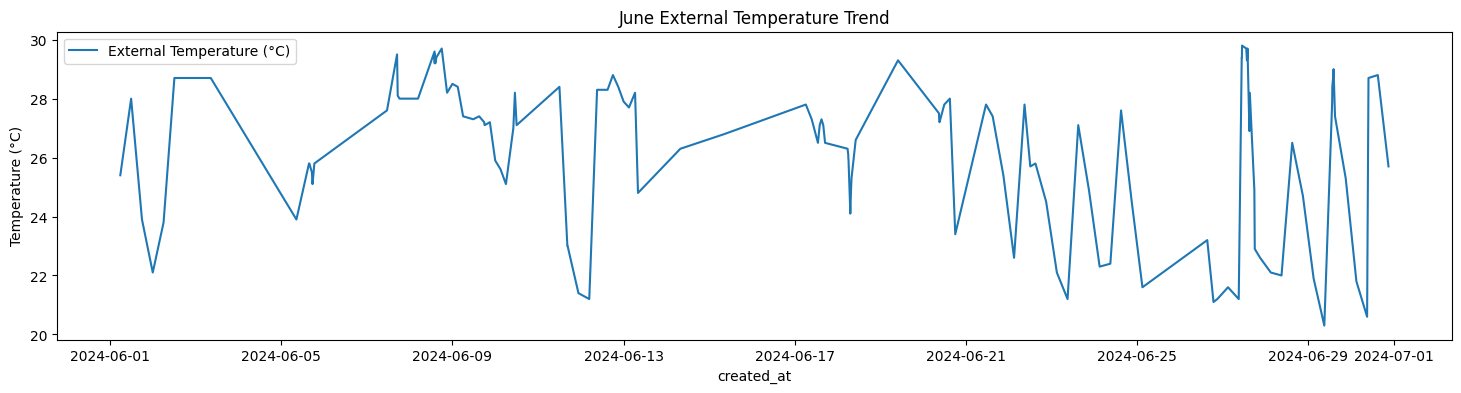

In [23]:
# External Temperature Analysis
# 1. Calculate Uptime (number of non-NaN entries)
# 2. Calculate Average Internal Temperature for June
# 3. Plot Internal Temperature for June

external_temp = june_data["temperatures"]['Exterior (°C)']
external_temp_uptime = external_temp.count()
external_temp_avg = external_temp.mean()

print(f"June External Temperature Uptime: {external_temp_uptime}")
print(f"June External Temperature Average: {external_temp_avg:.2f}°C")

plt.figure(figsize=(18, 4))
sns.lineplot(data=external_temp, label='External Temperature (°C)')
plt.title("June External Temperature Trend")
plt.ylabel("Temperature (°C)")
plt.show()


Correlation between June Internal and External Temperature: 0.92


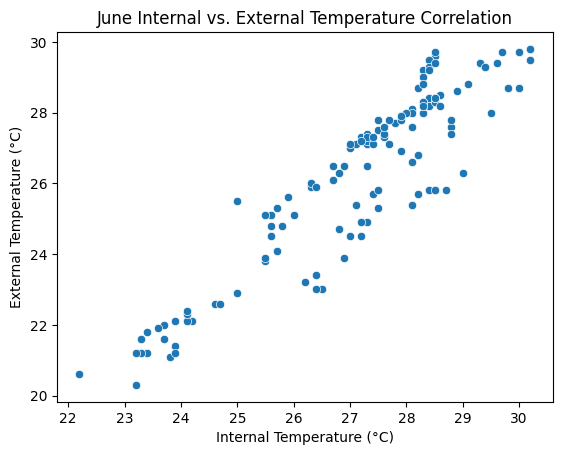

In [24]:
# Analyze correlation between internal and external temperature

temp_corr = internal_temp.corr(external_temp)
print(f"Correlation between June Internal and External Temperature: {temp_corr:.2f}")
sns.scatterplot(x=internal_temp, y=external_temp)
plt.title("June Internal vs. External Temperature Correlation")
plt.xlabel("Internal Temperature (°C)")
plt.ylabel("External Temperature (°C)")
plt.show()


June Internal Humidity Uptime: 137
June Internal Humidity Average: 70.58%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


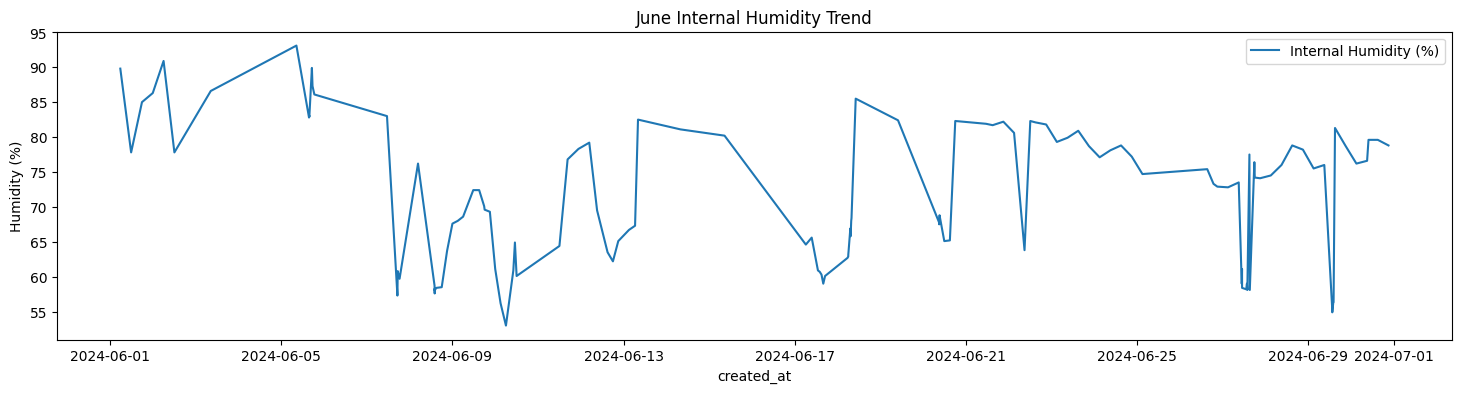

In [25]:
# Uptime, Average, and Plot for Internal Humidity

internal_humidity = june_data["humidity"]['Interior (%)']
internal_humidity_uptime = internal_humidity.count()
internal_humidity_avg = internal_humidity.mean()

print(f"June Internal Humidity Uptime: {internal_humidity_uptime}")
print(f"June Internal Humidity Average: {internal_humidity_avg:.2f}%")

plt.figure(figsize=(18, 4))
sns.lineplot(data=internal_humidity, label='Internal Humidity (%)')
plt.title("June Internal Humidity Trend")
plt.ylabel("Humidity (%)")
plt.show()


June External Humidity Uptime: 137
June External Humidity Average: 67.91%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


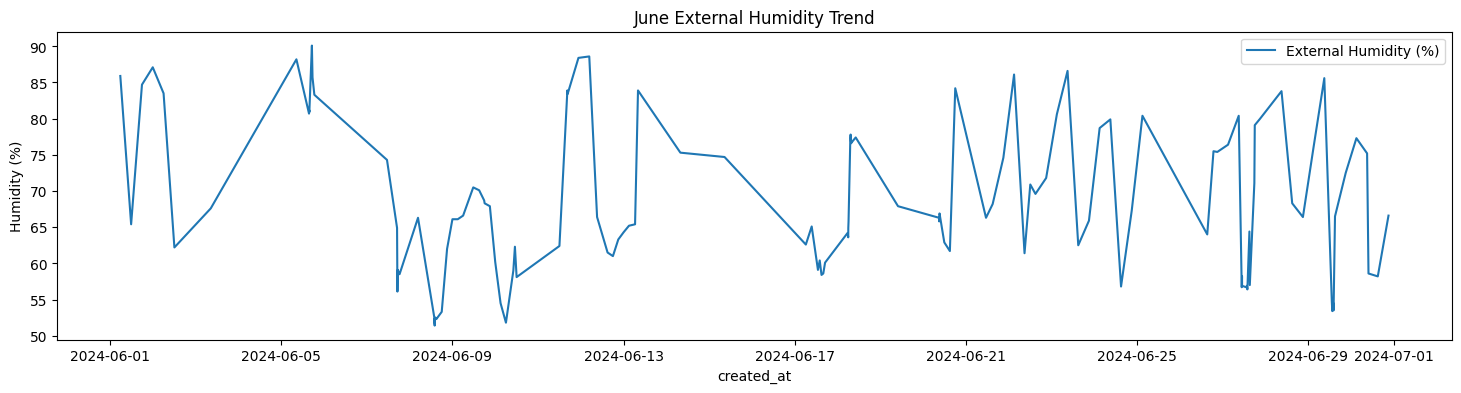

In [26]:
# Uptime, Average, and Plot for External Humidity

external_humidity = june_data["humidity"]['Exterior (%)']
external_humidity_uptime = external_humidity.count()
external_humidity_avg = external_humidity.mean()

print(f"June External Humidity Uptime: {external_humidity_uptime}")
print(f"June External Humidity Average: {external_humidity_avg:.2f}%")

plt.figure(figsize=(18, 4))
sns.lineplot(data=external_humidity, label='External Humidity (%)')
plt.title("June External Humidity Trend")
plt.ylabel("Humidity (%)")
plt.show()


Correlation between June Internal and External Humidity: 0.79


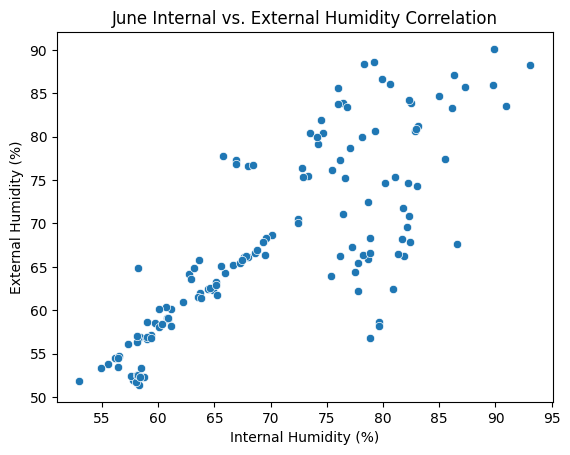

In [27]:
# Correlation between Internal and External Humidity

humidity_corr = internal_humidity.corr(external_humidity)
print(f"Correlation between June Internal and External Humidity: {humidity_corr:.2f}")
sns.scatterplot(x=internal_humidity, y=external_humidity)
plt.title("June Internal vs. External Humidity Correlation")
plt.xlabel("Internal Humidity (%)")
plt.ylabel("External Humidity (%)")
plt.show()


June Carbon Dioxide Uptime: 156
June Carbon Dioxide Average: 1190.72


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


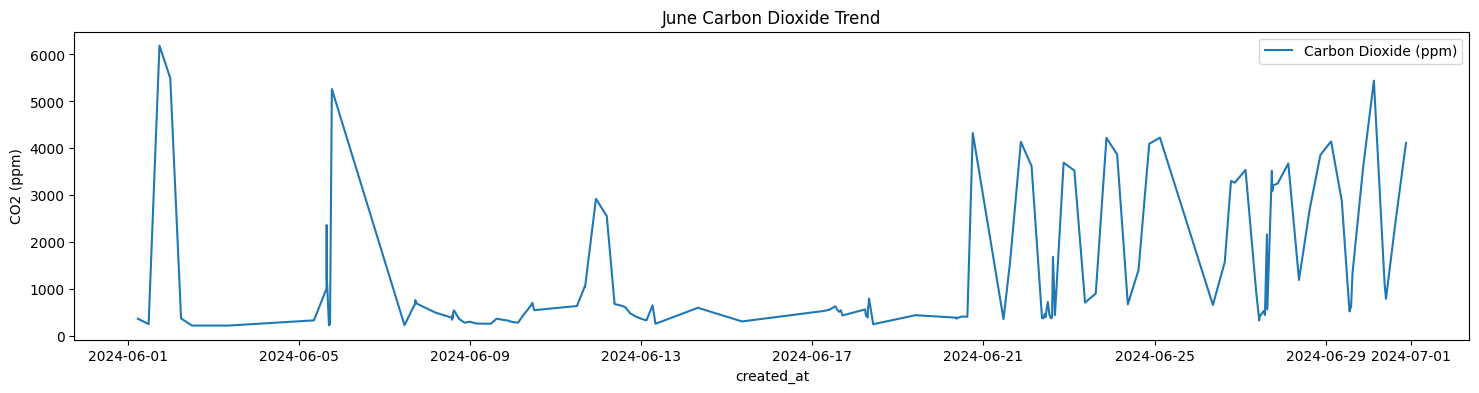

In [28]:
# Calculate Uptime and Average CO2 levels, and plot

co2 = june_data["carbondioxide"]['record']
co2_uptime = co2.count()
co2_avg = co2.mean()

print(f"June Carbon Dioxide Uptime: {co2_uptime}")
print(f"June Carbon Dioxide Average: {co2_avg:.2f}")

plt.figure(figsize=(18, 4))
sns.lineplot(data=co2, label='Carbon Dioxide (ppm)')
plt.title("June Carbon Dioxide Trend")
plt.ylabel("CO2 (ppm)")
plt.show()


Correlation between June Carbon Dioxide and Internal Temperature: -0.45


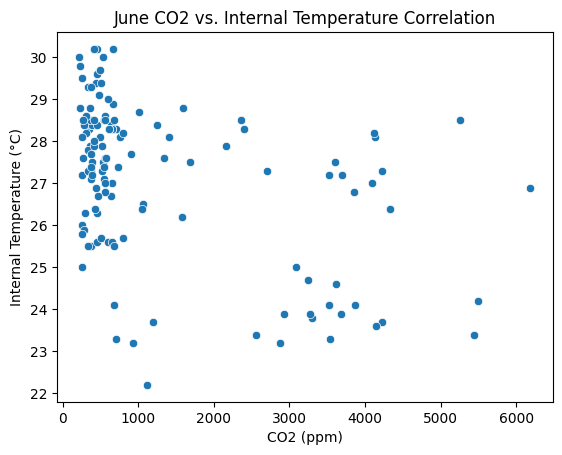

In [29]:
# Correlation between Carbon Dioxide and Internal Temperature

co2_temp_corr = co2.corr(internal_temp)
print(f"Correlation between June Carbon Dioxide and Internal Temperature: {co2_temp_corr:.2f}")
sns.scatterplot(x=co2, y=internal_temp)
plt.title("June CO2 vs. Internal Temperature Correlation")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Internal Temperature (°C)")
plt.show()


June Weight Uptime: 91
June Weight Average: 22.79
June Daily Weight Fluctuations (first 5 days):
created_at
2024-06-01 11:48:00    0.00
2024-06-01 17:53:00    0.06
2024-06-01 23:56:00    0.04
2024-06-02 06:00:00   -0.02
2024-06-02 12:04:00   -0.09
Name: record, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


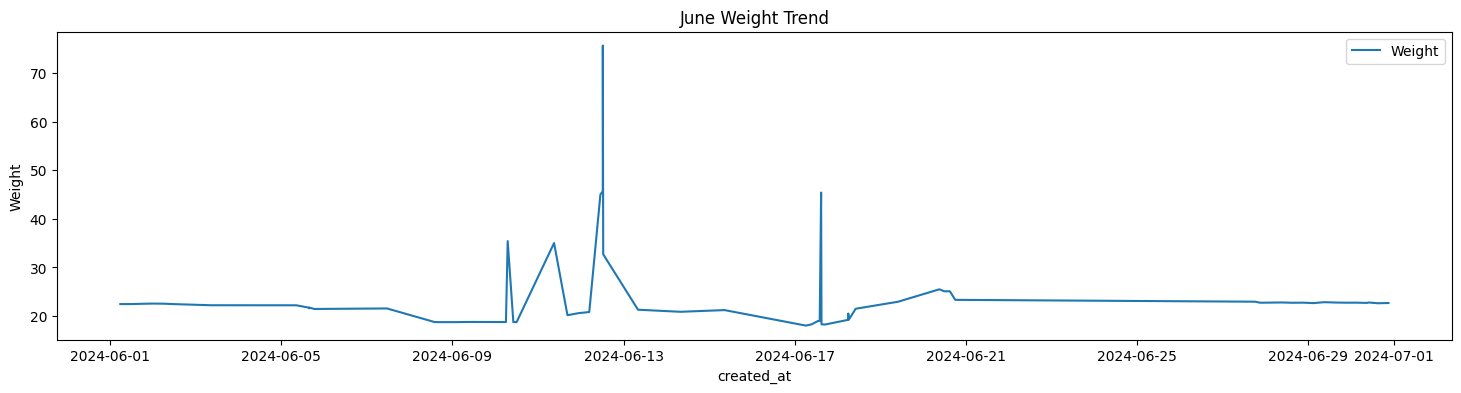

In [30]:
# Calculate Uptime, Daily Fluctuations, Average, and plot

weight = june_data["weights"]['record']
weight_uptime = weight.count()
weight_avg = weight.mean()
weight_daily_fluctuations = weight.diff().dropna()

print(f"June Weight Uptime: {weight_uptime}")
print(f"June Weight Average: {weight_avg:.2f}")
print("June Daily Weight Fluctuations (first 5 days):")
print(weight_daily_fluctuations.head())

plt.figure(figsize=(18, 4))
sns.lineplot(data=weight, label='Weight')
plt.title("June Weight Trend")
plt.ylabel("Weight")
plt.show()


Correlation between June Weight and Internal Temperature: -0.19


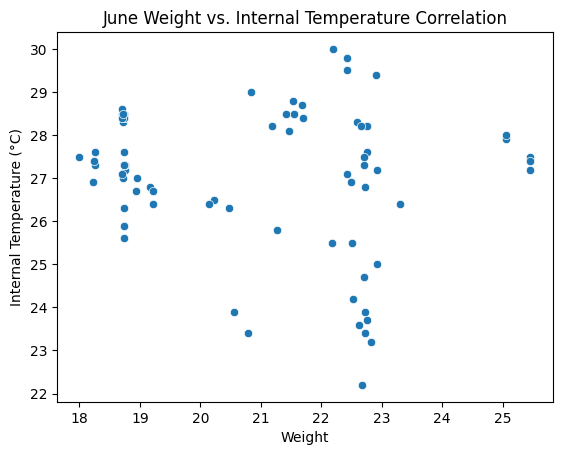

In [31]:
# Correlation between Weight and Internal Temperature

weight_temp_corr = weight.corr(internal_temp)
print(f"Correlation between June Weight and Internal Temperature: {weight_temp_corr:.2f}")
sns.scatterplot(x=weight, y=internal_temp)
plt.title("June Weight vs. Internal Temperature Correlation")
plt.xlabel("Weight")
plt.ylabel("Internal Temperature (°C)")
plt.show()


Correlation between June Weight and Carbon Dioxide: 0.44


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

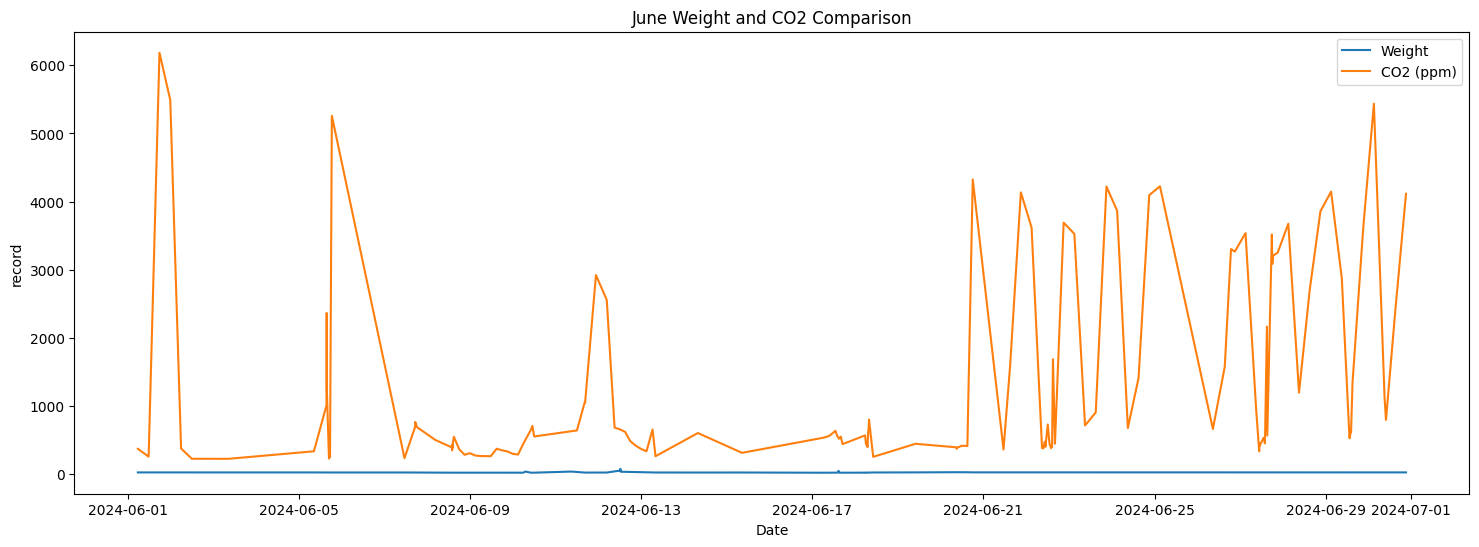

In [32]:
# Correlation between Weight and Carbon Dioxide
weight_co2_corr = weight.corr(co2)
print(f"Correlation between June Weight and Carbon Dioxide: {weight_co2_corr:.2f}")

# Plot weight and CO2 levels to observe any trends over time

plt.figure(figsize=(18, 6))
sns.lineplot(data=weight, label="Weight")
sns.lineplot(data=co2, label="CO2 (ppm)")
plt.title("June Weight and CO2 Comparison")
plt.xlabel("Date")
plt.legend()
plt.show()
